# Método de Monte Carlo para Integrales

En este cuaderno uniformes para aproximar el valor de algunas integrales. Si se quiere consultar la teoría respecto a este tema se puede consultar [Integración Monte Carlo](https://www.cartagena99.com/recursos/alumnos/apuntes/IntegracionMonteCarlo_General.pdf).

**Pseudo-Código para aproximar integrales via Monte Carlo**

Sea $f:[a,b] ⟶ \mathbb{R}$ integrable y positiva en su dominio. Queremos aproximar el valor de $\int_a^bf(x)dx$. Supongamos que $M>0$ es una cota para la función.

1. Sea $N \in \mathbb{N}$ el número de iteraciones.
2. Simulamos $N$ vectores aleatorios $(X_1, Y_1), ..., (X_N, Y_N)$ uniformes en el rectángulo $[a,b] \times [0,M]$.
3. Inicializamos un $\texttt{contador}$.
4. Para cada $i \in \{1,2,...,N\}$, si $Y \leq f(X)$, entonces agregamos 1 a $\texttt{contador}$. Si no, continuamos.
5. Aproximamos la integral por $M(b-a)\frac{contador}{N}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

Ejemplo 1

$$f(x) = x \text{ en } [0,1]$$

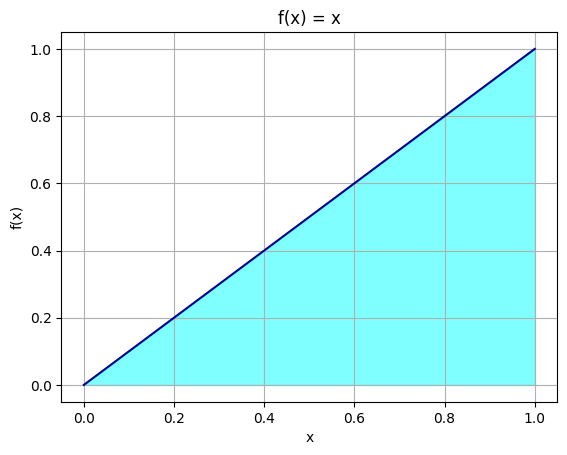

In [6]:
xpoints = np.linspace(0,1,10000)
plt.plot(xpoints, xpoints, color = 'darkblue')
plt.fill_between(xpoints, xpoints, color='cyan', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = x')
plt.grid()
plt.show()

Ahora simulamos los vectores aleatorios

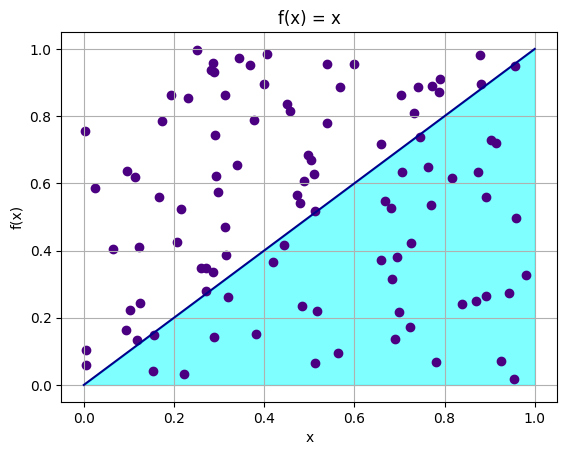

In [26]:
u1 = np.random.uniform(0,1,100)
u2 = np.random.uniform(0,1,100)

xpoints = np.linspace(0,1,10000)
plt.plot(xpoints, xpoints, color = 'darkblue')
plt.fill_between(xpoints, xpoints, color='cyan', alpha=0.5)
plt.scatter(u1, u2, color='indigo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = x')
plt.grid()
plt.show()

Ahora aproximamos la integral

In [14]:
contador = 0
for i in range(len(u1)):
  if u2[i] <= u1[i]:
    contador += 1
  else:
    0
print(contador / len(u1))

0.488


Cada vez que corremos el programa obtenemos un resultado diferente porque es una nueva aproximación

In [20]:
u1 = np.random.uniform(0,1,1000)
u2 = np.random.uniform(0,1,1000)
contador = 0
for i in range(len(u1)):
  if u2[i] <= u1[i]:
    contador += 1
  else:
    0
print(contador / len(u1))

0.503


Ejemplo 2

$$f(x) = x^{n} \text{ en } [0,1]$$

Haremos una función para graficar el vector aleatorio y después estime la integral

In [27]:
def integral_polinomio(n, N=1000):
  # Simulamos las uniformes
  unif1 = np.random.uniform(0,1,N)
  unif2 = np.random.uniform(0,1,N)

  # Graficamos la función
  xpoints = np.linspace(0,1,10000)
  plt.figure()
  plt.plot(xpoints, xpoints**n, color = 'darkblue')
  plt.fill_between(xpoints, xpoints**n, color='cyan', alpha=0.5)
  plt.scatter(unif1, unif2, color='indigo')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(f'f(x) = x^{n}')
  plt.grid()
  plt.show()

  # Aproximamos la integral
  contador = 0
  for i in range(len(unif1)):
    if unif2[i] <= unif1[i]**n:
      contador += 1
    else:
      0
  print(f'La integral de 0 a 1 de x^{n} es', contador / N)

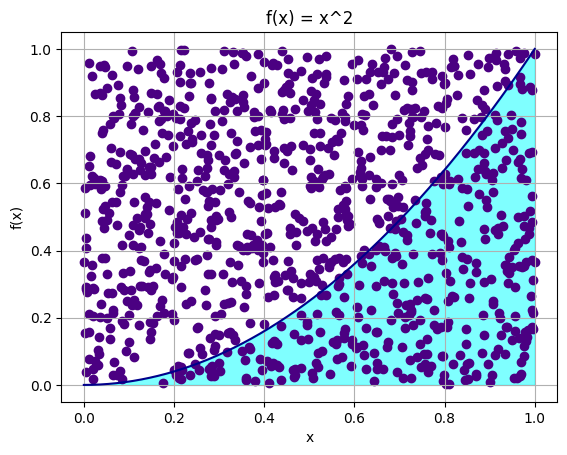

La integral de 0 a 1 de x^2 es 0.325


In [28]:
integral_polinomio(2)

Ejemplo 3

Sabemos que la función $f(x) = e^{-\frac{x^2}{2}}$ no tiene una antiderivada, pero podemos estimar su integral impropia por medio de Monte Carlo. Supongamos que la integraremos en el intervalo $[-100, 100]$

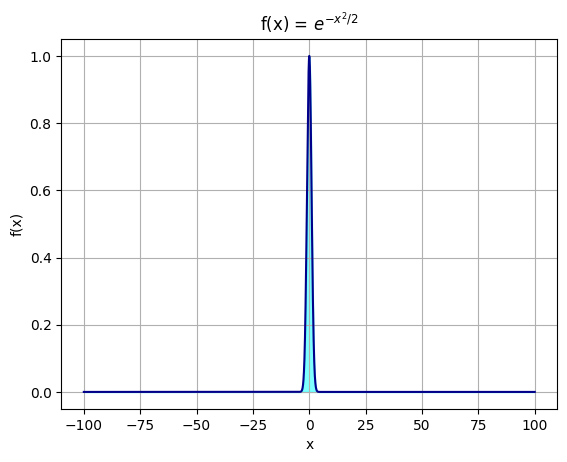

In [97]:
xpoints3 = np.linspace(-100,100,10000)
plt.figure()
plt.plot(xpoints3, np.exp(-xpoints3**2/2), color = 'darkblue')
plt.fill_between(xpoints3, np.exp(-xpoints3**2/2), color='cyan', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'f(x) = $e^{-x^2/2}$')
plt.grid()
plt.show()

Ahora estimamos la integral

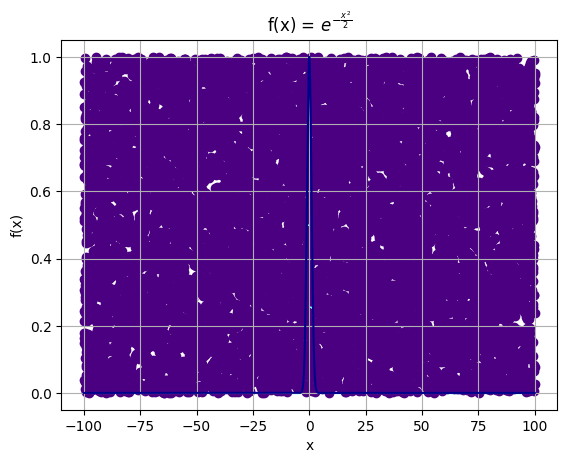

2.34 2.5066282746310002


In [106]:
def f(x):
  return math.exp(-x**2/2)

N = 10000
unif31 = np.random.uniform(-100,100,N)
unif32 = np.random.uniform(0,1,N)

plt.figure()
plt.plot(xpoints3, np.exp(-xpoints3**2/2), color = 'darkblue')
plt.fill_between(xpoints3, np.exp(-xpoints3**2/2), color='cyan', alpha=0.5)
plt.scatter(unif31, unif32, color='indigo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'f(x) = $e^{-\frac{x^2}{2}}$')
plt.grid()
plt.show()

contador3 = 0
for i in range(len(unif31)):
  if unif32[i] <= f(unif31[i]):
    contador3 += 1
  else:
    0
print(200*contador3 / len(unif31), math.sqrt(2*math.pi))


Ahora metemos esto a una función

In [107]:
def aproximar_integral3(N=10000, grafico = True):
  # Las uniformes
  unif31 = np.random.uniform(-100,100,N)
  unif32 = np.random.uniform(0,1,N)

  # Las gráficas
  if grafico:
    xpoints3 = np.linspace(-100,100,N)
    plt.figure()
    plt.plot(xpoints3, np.exp(-xpoints3**2/2), color = 'darkblue')
    plt.fill_between(xpoints3, np.exp(-xpoints3**2/2), color='cyan', alpha=0.5)
    plt.scatter(unif31, unif32, color='indigo')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(r'f(x) = $e^{-x^2}$')
    plt.grid()
    plt.show()

  # Aproximamos la integral
  contador3 = 0
  for i in range(len(unif31)):
    if unif32[i] <= f(unif31[i]):
      contador3 += 1
    else:
      0

  # Imprimimos la aproximación
  #print('La aproximación de la integral es:', 200*contador3 / len(unif31))
  return 200*contador3 / len(unif31)

aproximaciones = [aproximar_integral3(1000, False) for i in range(1000)]
print(np.mean(aproximaciones))

2.4864


In [90]:
math.sqrt(2*math.pi)

2.5066282746310002

Además, $\sqrt{2\pi}≈ 2.506628...$, y ocurre que $$\displaystyle \int_{-\infty}^{\infty} e^{-\frac{x^2}{2}} = \sqrt{2\pi}$$

Finalmente, hacemos una clase para hacer este procedimiento de manera sencilla

In [88]:
class MonteCarlo:

  def __init__(self, f, a, b, M, N=1000):
    '''
    f: función a integrar
    a: límite inferior
    b: límite superior
    M: cota para la función
    N: número de iteraciones
    '''
    self.f = f
    self.a = a
    self.b = b
    self.N = N
    self.M = M

  def aproximar_integral(self):
    # Las uniformes
    unif31 = np.random.uniform(self.a,self.b,self.N)
    unif32 = np.random.uniform(0,self.M,self.N)
    # Aproximación
    indicadora = 0
    for i in range(len(unif31)):
      if unif32[i] <= self.f(unif31[i]):
        indicadora += 1
      else:
        0
    return unif31, unif32, (self.b-self.a)*indicadora / self.N

  def graficar(self):
    xpoints = np.linspace(self.a,self.b, self.N)
    u1, u2, app = self.aproximar_integral()
    plt.figure()
    plt.plot(xpoints, self.f(xpoints), color = 'darkblue')
    plt.fill_between(xpoints, self.f(xpoints), color='cyan', alpha=0.5)
    plt.scatter(u1, u2, color='indigo')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'f(x) = {self.f.__name__}')
    plt.grid()
    plt.show()
    print('La aproximación de esta iteración fue', app)


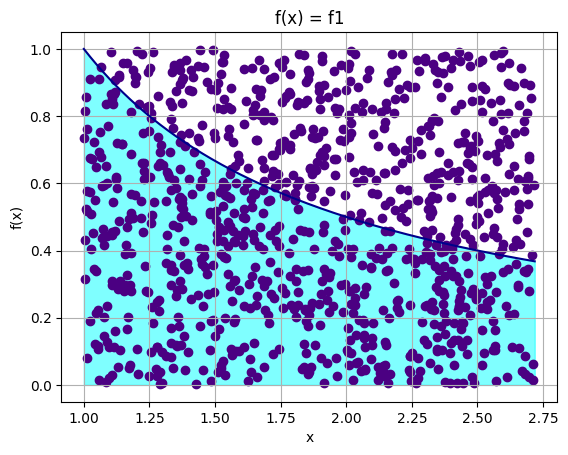

La aproximación de esta iteración fue 1.0051948696485413


In [89]:
def f1(x):
  return 1/x

clase1 = MonteCarlo(f1, 1, math.exp(1), 1)
clase1.graficar()

¡Con esto podemos aproximar cualquier integral!